<a href="https://colab.research.google.com/github/kalaivanan1/chef/blob/master/Basic_Models_with_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the Libraries
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [ ]:
# define dataset
df=pd.read_excel(r'/content/Cauvery.Train.xls')

ImportError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop('Class', axis=1)
y = df.Class
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scale data
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

NameError: ignored

In [ ]:
excluded = ['COD','Calcium','Hardness','Magnesium','Nitrogen','Phosphate','Potassium','Sulphate','Sodium','Total Dissolved Solids','Total Fixed Solids','Total Suspended Solids','Turbidity','Class','Boron','Fluoride','Nitrate','Phenophthaline Alkalinity','Total coliform']
df = df.drop(columns=excluded, errors='ignore')

0.6285714285714286



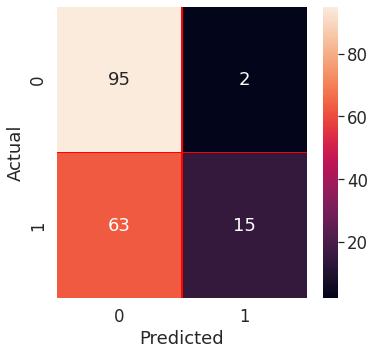


classification_report

              precision    recall  f1-score   support

           0       0.60      0.98      0.75        97
           1       0.88      0.19      0.32        78

    accuracy                           0.63       175
   macro avg       0.74      0.59      0.53       175
weighted avg       0.73      0.63      0.55       175




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define model
log = LogisticRegression()
# fit model on training set
log.fit(X_train, y_train)
# make prediction on test set
y_pred = log.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
print("")
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
print("")
y_pred_prob_log = log.predict_proba(X_test)[:,1]
fpr_log, tpr_log, thresholds_lo = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
precision_log, recall_log, th_log = precision_recall_curve(y_test, y_pred_prob_log)

0.7657142857142857


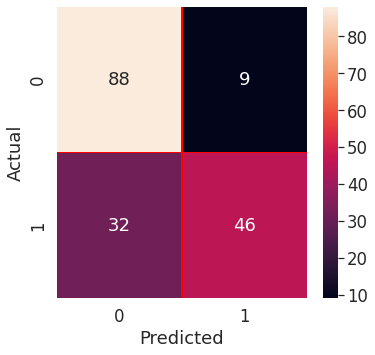


classification_report

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        97
           1       0.84      0.59      0.69        78

    accuracy                           0.77       175
   macro avg       0.78      0.75      0.75       175
weighted avg       0.78      0.77      0.76       175



In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
# define model
rf = RandomForestClassifier()
# fit model on training set
rf.fit(X_train, y_train)
# make prediction on test set
y_pred = rf.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

0.6514285714285715


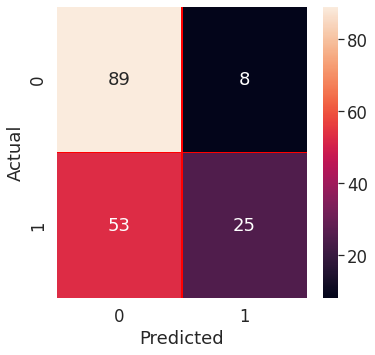


classification_report

              precision    recall  f1-score   support

           0       0.63      0.92      0.74        97
           1       0.76      0.32      0.45        78

    accuracy                           0.65       175
   macro avg       0.69      0.62      0.60       175
weighted avg       0.69      0.65      0.61       175



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# define model
knn = KNeighborsClassifier(9)
# fit model on training set
knn.fit(X_train, y_train)
# make prediction on test set
y_pred = knn.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_prob_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6742857142857143


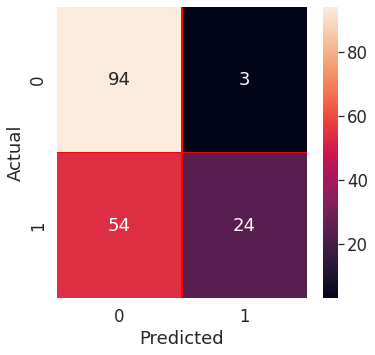


classification_report

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        97
           1       0.89      0.31      0.46        78

    accuracy                           0.67       175
   macro avg       0.76      0.64      0.61       175
weighted avg       0.75      0.67      0.63       175



In [ ]:
from sklearn.neural_network import MLPClassifier# define model
mlp = MLPClassifier()
# fit model on training set
mlp.fit(X_train, y_train)
# make prediction on test set
y_pred = mlp.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_mlp = mlp.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
precision_mlp, recall_mlp, th_mlp = precision_recall_curve(y_test, y_pred_prob_mlp)

0.76


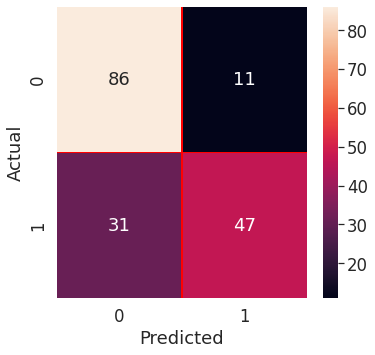


classification_report

              precision    recall  f1-score   support

           0       0.74      0.89      0.80        97
           1       0.81      0.60      0.69        78

    accuracy                           0.76       175
   macro avg       0.77      0.74      0.75       175
weighted avg       0.77      0.76      0.75       175



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# define model
ext = ExtraTreesClassifier(n_estimators= 500)
# fit model on training set
ext.fit(X_train, y_train)
# make prediction on test set
y_pred = ext.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_ext = ext.predict_proba(X_test)[:,1]
fpr_ext, tpr_ext, thresholds_ext = roc_curve(y_test, y_pred_prob_ext)
roc_auc_ext = auc(fpr_ext, tpr_ext)
precision_ext, recall_ext, th_ext = precision_recall_curve(y_test, y_pred_prob_ext)

0.7314285714285714


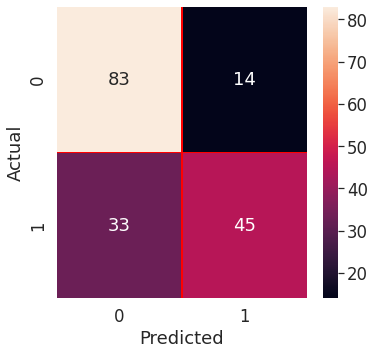


classification_report

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        97
           1       0.76      0.58      0.66        78

    accuracy                           0.73       175
   macro avg       0.74      0.72      0.72       175
weighted avg       0.74      0.73      0.72       175



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# define model
ada = AdaBoostClassifier()
# fit model on training set
ada.fit(X_train, y_train)
# make prediction on test set
y_pred = ada.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_ada = ada.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
precision_ada, recall_ada, th_ada = precision_recall_curve(y_test, y_pred_prob_ada)

0.7542857142857143


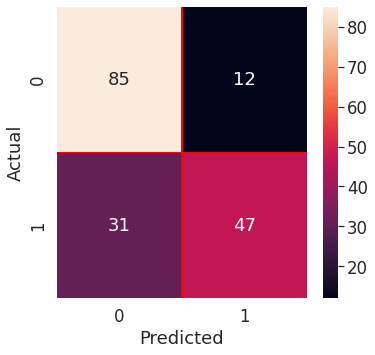


classification_report

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        97
           1       0.80      0.60      0.69        78

    accuracy                           0.75       175
   macro avg       0.76      0.74      0.74       175
weighted avg       0.76      0.75      0.75       175



In [ ]:
import xgboost as xgb
# define model
xgb = xgb.XGBClassifier(n_estimators= 100)
# fit model on training set
xgb.fit(X_train, y_train)
# make prediction on test set
y_pred = xgb.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

0.6057142857142858


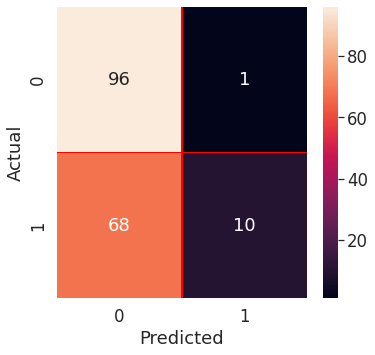


classification_report

              precision    recall  f1-score   support

           0       0.59      0.99      0.74        97
           1       0.91      0.13      0.22        78

    accuracy                           0.61       175
   macro avg       0.75      0.56      0.48       175
weighted avg       0.73      0.61      0.51       175



In [ ]:
from sklearn.svm import SVC 
# define model
svc = SVC(kernel='linear',gamma='auto',probability=True)
# fit model on training set
svc.fit(X_train, y_train)
# make prediction on test set
y_pred = svc.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
precision_svc, recall_svc, th_svc = precision_recall_curve(y_test, y_pred_prob_svc)

0.7085714285714285


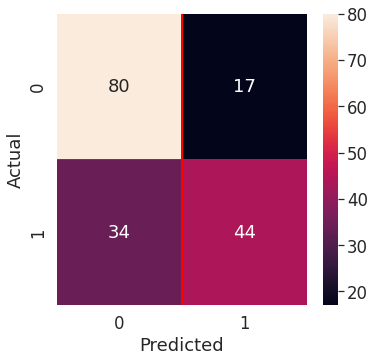


classification_report

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        97
           1       0.72      0.56      0.63        78

    accuracy                           0.71       175
   macro avg       0.71      0.69      0.70       175
weighted avg       0.71      0.71      0.70       175



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# define model
dt = DecisionTreeClassifier()
# fit model on training set
dt.fit(X_train, y_train)
# make prediction on test set
y_pred = dt.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_lr = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
precision_dt, recall_dt, th_dt = precision_recall_curve(y_test, y_pred_prob_dt)

0.76


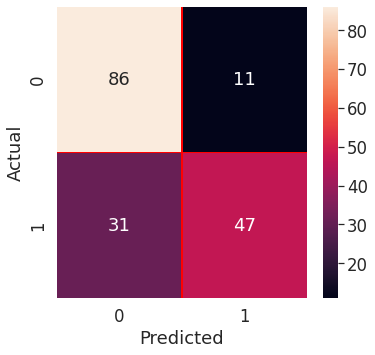


classification_report

              precision    recall  f1-score   support

           0       0.74      0.89      0.80        97
           1       0.81      0.60      0.69        78

    accuracy                           0.76       175
   macro avg       0.77      0.74      0.75       175
weighted avg       0.77      0.76      0.75       175



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# define model
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
# fit model on training set
gbm.fit(X_train, y_train)
# make prediction on test set
y_pred = gbm.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
cm=confusion_matrix(y_test,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("")
print("classification_report")
print("")
print(classification_report(y_test, y_pred))
y_pred_prob_gbm = gbm.predict_proba(X_test)[:,1]
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
precision_gbm, recall_gbm, th_gbm = precision_recall_curve(y_test, y_pred_prob_gbm)

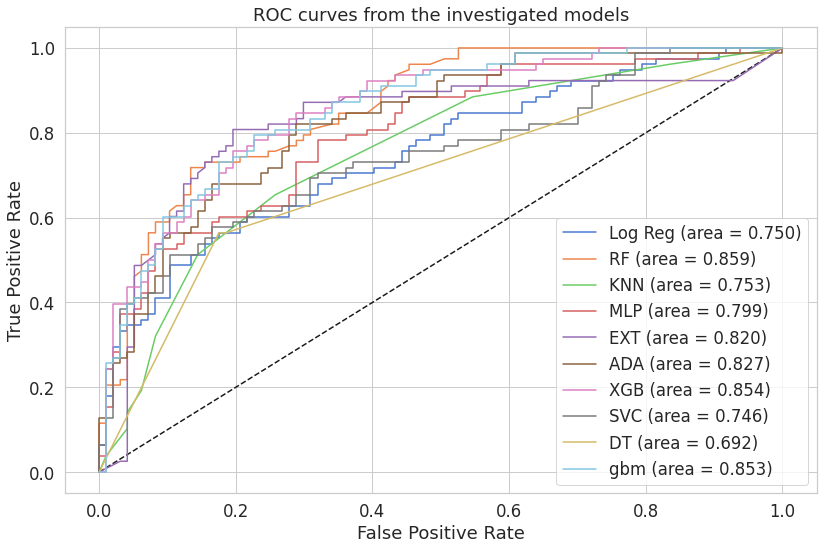

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Log Reg (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.3f)' % roc_auc_mlp)
plt.plot(fpr_ext, tpr_ext, label='EXT (area = %0.3f)' % roc_auc_ext)
plt.plot(fpr_ada, tpr_ada, label='ADA (area = %0.3f)' % roc_auc_ada)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.plot(fpr_svc, tpr_svc, label='SVC (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_dt, tpr_dt, label='DT (area = %0.3f)' % roc_auc_dt)
plt.plot(fpr_gbm, tpr_gbm, label='gbm (area = %0.3f)' % roc_auc_gbm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

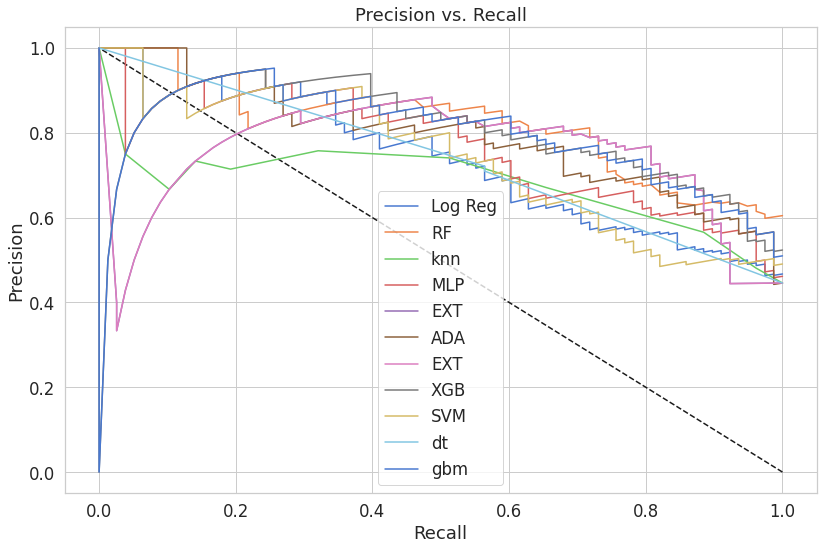

In [ ]:
plt.plot([1, 0], [0, 1],'k--')
plt.plot(recall_log, precision_log, label='Log Reg')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_mlp, precision_mlp, label='MLP')
plt.plot(recall_ext, precision_ext, label='EXT')
plt.plot(recall_ada, precision_ada, label='ADA')
plt.plot(recall_ext, precision_ext, label='EXT')
plt.plot(recall_xgb, precision_xgb, label='XGB')
plt.plot(recall_svc, precision_svc, label='SVM')
plt.plot(recall_dt, precision_dt, label='dt')
plt.plot(recall_gbm, precision_gbm, label='gbm')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()